### CIS 9: Lab 3b
Unsupervised Learning: clustering

You are asked by a car insurance company to help the company adjust the insurance premium that they charge their customers. Currently all customers are charged the same insurance rate, but the company would like to decrease the rate for customers who don't file expensive claims, and raise the rate for those who have high claims.

The company gives you customer data for the year 2020, and asks you to group the customers based on their risks as drivers.<br>
The input data is in `carInsurance.csv`([source](https://www.kaggle.com/datasets/lakshmanraj/vehicle-insurance-policy))

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

1. __Read data from the file `carInsurance.csv`__ into a DataFrame<br>
Then __print the number of rows and columns of the DataFrame__ and __print the first 5 rows__

In [2]:
df = pd.read_csv("carInsurance.csv")
print("Shape", df.shape)
print(df.head())

Shape (60392, 15)
   pol_number  pol_eff_dt gender  agecat date_of_birth  credit_score area  \
0    43124327  12/30/2020      F     4.0     7/12/1968         381.0    D   
1    21919609  12/30/2020      F     2.0     11/5/1982         549.0    D   
2    72577057  12/30/2020      M     2.0    11/26/1983         649.0    B   
3    92175225  12/30/2020      M     4.0     11/2/1960         743.0    B   
4    66223239  12/30/2020      F     4.0      1/4/1968         817.0    C   

   traffic_index  veh_age veh_body  veh_value claim_office  numclaims  \
0          133.6        2    HBACK      1.331          NaN          0   
1          163.6        1      UTE      3.740          NaN          0   
2          117.5        4    COUPE      0.880          NaN          0   
3          100.7        3    SEDAN      1.045          NaN          0   
4          115.5        4    HBACK      0.473          NaN          0   

   claimcst0  annual_premium  
0        0.0          716.53  
1        0.0      

2. Some of the columns are not needed or are duplicate of other columns<br>
__Remove the following columns__:
- The policy effective date (`pol_eff_dt`): are all for the year 2020
- The `date_of_birth`: corresponds to the age cat (`agecat`)
- The `area`: is not as significant as the `traffic_index`
- The `claim_office`: has no influence on how much insurance claim is made by the customer
- The `annual_premium`: is currently the same for all customers
- And one more column that doesn't provide the ML model with patterns in the data

Use Jupyter Notebook print to __print the resulting DataFrame__

In [3]:
df.drop(columns=["pol_eff_dt", "date_of_birth", "area", "claim_office", "annual_premium", "pol_number"], inplace=True)
print(df.head())

  gender  agecat  credit_score  traffic_index  veh_age veh_body  veh_value  \
0      F     4.0         381.0          133.6        2    HBACK      1.331   
1      F     2.0         549.0          163.6        1      UTE      3.740   
2      M     2.0         649.0          117.5        4    COUPE      0.880   
3      M     4.0         743.0          100.7        3    SEDAN      1.045   
4      F     4.0         817.0          115.5        4    HBACK      0.473   

   numclaims  claimcst0  
0          0        0.0  
1          0        0.0  
2          0        0.0  
3          0        0.0  
4          0        0.0  


3. __Show the number of NaN in each columns__.<br>
Then __drop rows with NaN__ and __print the number of remaining rows and columns__

In [4]:
print(df.isna().sum())
df.dropna(inplace=True)
print("\nShape", df.shape)

gender              0
agecat           4831
credit_score     2801
traffic_index    3503
veh_age             0
veh_body            0
veh_value           0
numclaims           0
claimcst0           0
dtype: int64

Shape (49919, 9)


4. The dataset is still large enough to continue with it.<br>
__Change the `gender` and `veh_body` to numeric data__<br>
Then __print the first 5 rows of the resulting DataFrame__

In [5]:
df["gender"] = pd.factorize(df["gender"])[0]
df["veh_body"] = pd.factorize(df["veh_body"])[0]
print(df.head())

   gender  agecat  credit_score  traffic_index  veh_age  veh_body  veh_value  \
0       0     4.0         381.0          133.6        2         0      1.331   
1       0     2.0         549.0          163.6        1         1      3.740   
2       1     2.0         649.0          117.5        4         2      0.880   
3       1     4.0         743.0          100.7        3         3      1.045   
4       0     4.0         817.0          115.5        4         0      0.473   

   numclaims  claimcst0  
0          0        0.0  
1          0        0.0  
2          0        0.0  
3          0        0.0  
4          0        0.0  


5. __Create a plot with subplots to observe the correlation, if any, of each column and the `claimcst0`__, which is the insurance claim amount.<br>
The higher the claim, the more costly the customer is to the company.

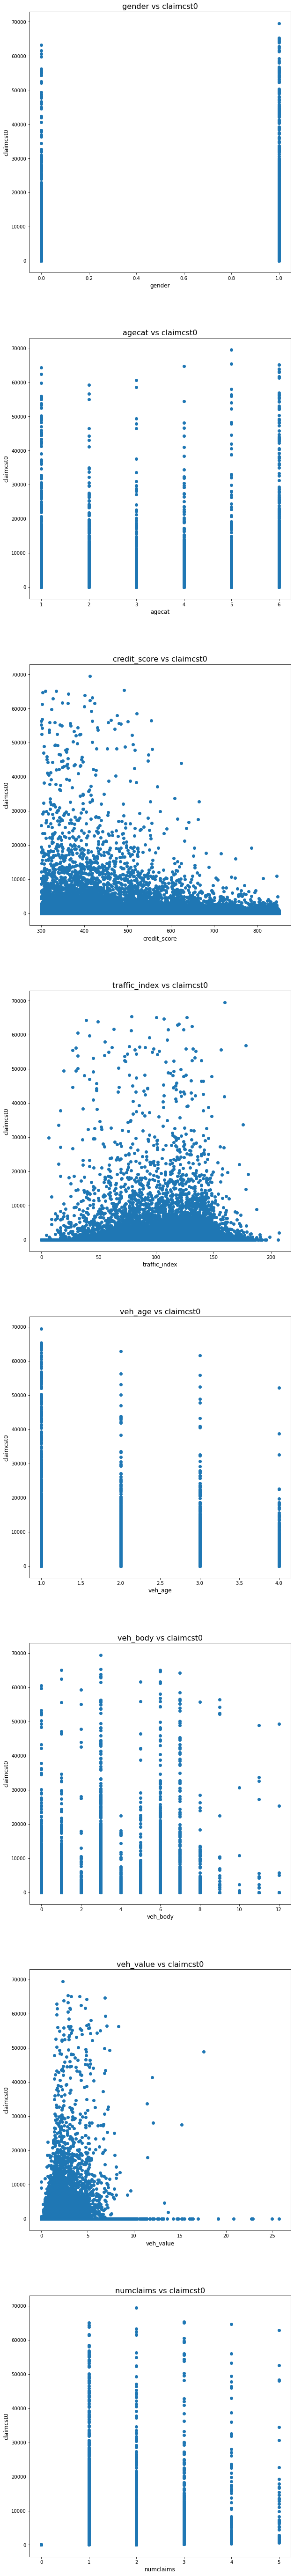

In [6]:
fig = plt.figure(figsize=(10, 100))
plt.subplots_adjust(hspace = 0.25)
for i in range(df.shape[1]-1):
    plt.subplot(df.shape[1]-1, 1, i+1)
    plt.title(f"{df.columns[i]} vs claimcst0",fontsize=16)
    plt.xlabel(df.columns[i], fontsize=12)
    plt.ylabel("claimcst0", fontsize=12)
    plt.scatter(df[df.columns[i]], df["claimcst0"])

6. Based on the subplots, __remove columns that don't have much correlation to the claim amount__.<br>
Then __show the first 5 rows of the resulting DataFrame__

In [7]:
df.drop(columns=["credit_score", "traffic_index", "veh_value"], inplace=True)
print(df.head())

   gender  agecat  veh_age  veh_body  numclaims  claimcst0
0       0     4.0        2         0          0        0.0
1       0     2.0        1         1          0        0.0
2       1     2.0        4         2          0        0.0
3       1     4.0        3         3          0        0.0
4       0     4.0        4         0          0        0.0


7. __Use k-Means Clustering to group the customers based on their claim amount__.<br>
You will need to create more than one Code cells.<br> 
In the last Code cell, __print each cluster number and the mean claim amount of customers in that cluster__

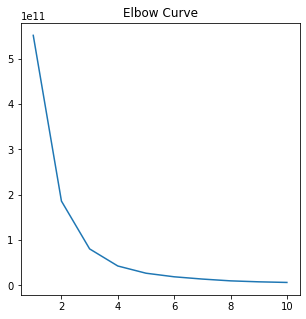

In [8]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')   # k-means++ is a good general purpose seed value for randomly selecting the initial centroids
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

In [9]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

In [10]:
first_cluster = df[y_kmeans == 0]
second_cluster = df[y_kmeans == 1]
third_cluster = df[y_kmeans == 2]

print(f"Cluster Number: {i}, Mean Claim Amount: ${first_cluster.claimcst0.mean():.2f}")
print(f"Cluster Number: {i}, Mean Claim Amount: ${second_cluster.claimcst0.mean():.2f}")
print(f"Cluster Number: {i}, Mean Claim Amount: ${third_cluster.claimcst0.mean():.2f}")

Cluster Number: 10, Mean Claim Amount: $206.53
Cluster Number: 10, Mean Claim Amount: $42146.84
Cluster Number: 10, Mean Claim Amount: $11445.45


8. Further prove that your clusters are partitioned correctly by plotting the distribution of claim amounts of each cluster.<br>
__Create a plot with subplots to show the claim amount `cst0` distribution of each cluster__<br>
Make sure to have a title for each subplot.

(array([374., 212., 178., 119.,  64.,  81.,  51.,  31.,  32.,  25.]),
 array([ 5828.508797 ,  7916.3651553, 10004.2215136, 12092.0778719,
        14179.9342302, 16267.7905885, 18355.6469468, 20443.5033051,
        22531.3596634, 24619.2160217, 26707.07238  ]),
 <BarContainer object of 10 artists>)

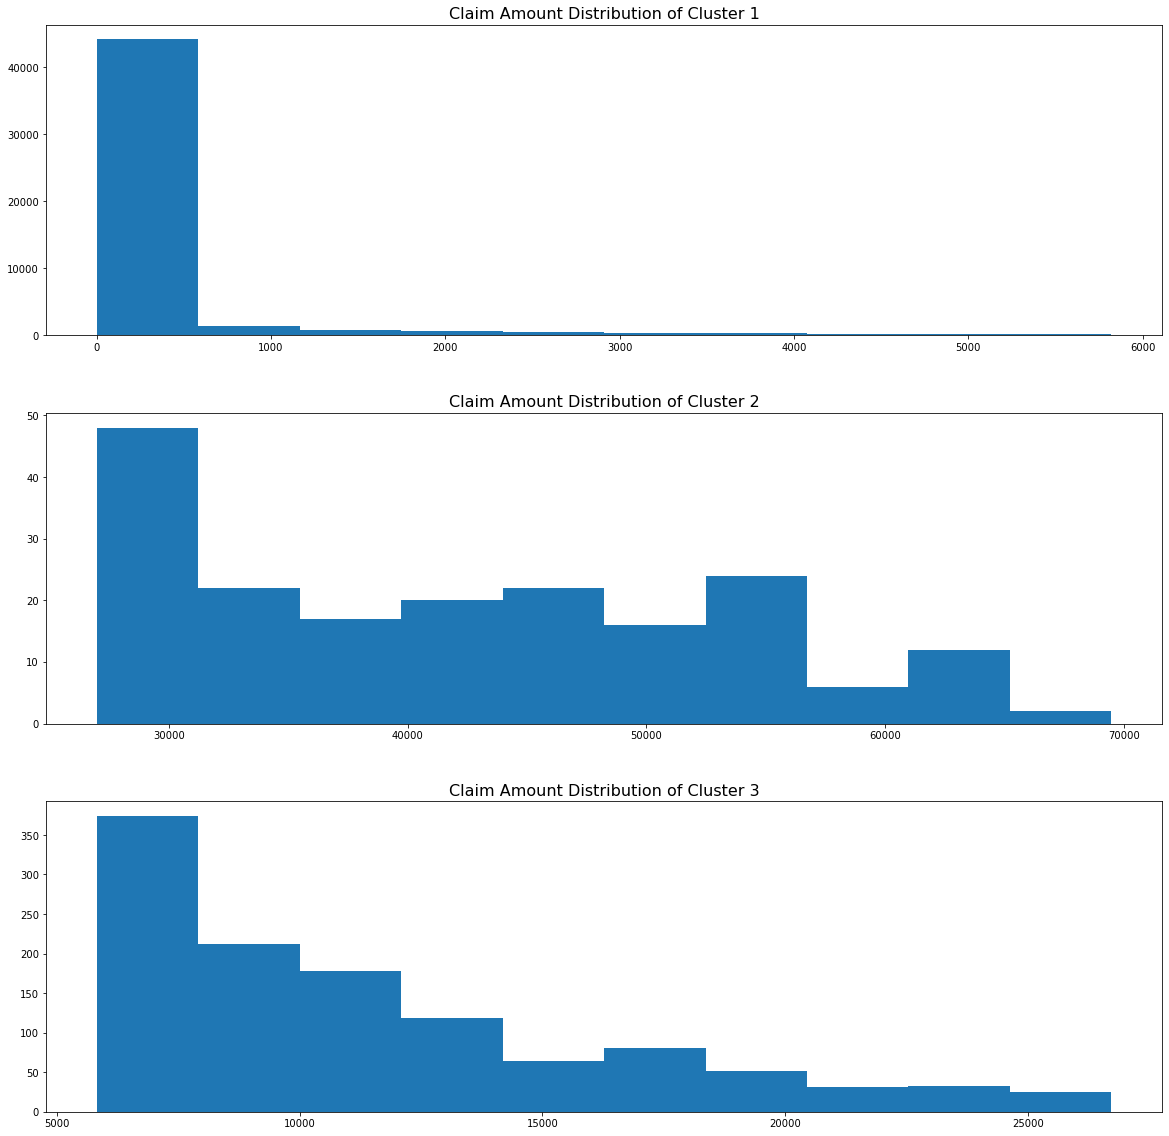

In [24]:
fig = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.25)

plt.subplot(3, 1, 1)
plt.title("Claim Amount Distribution of Cluster 1", fontsize=16)
plt.hist(first_cluster.claimcst0, bins=10)

plt.subplot(3, 1, 2)
plt.title("Claim Amount Distribution of Cluster 2", fontsize=16)
plt.hist(second_cluster.claimcst0, bins=10)

plt.subplot(3, 1, 3)
plt.title("Claim Amount Distribution of Cluster 3", fontsize=16)
plt.hist(third_cluster.claimcst0, bins=10)

9. Create new Code cells as needed to provide data to answer the following questions from the insurance company:
- Which cluster has the highest number of customers?
- Observe the characteristics of the customers in each cluster and comment on <u>each</u> of the following attributes:<br>
gender, age, credit score, vehicle age, vehicle value, and number of claims.<br>

Examples of an observation: _there is not much age difference between the clusters_ (make sure your Code has proof of this)<br>
Or: _the vehicle value tends to be lower for the customers with low claim amount, and gets higher with high claim amount_ (make sure your Code cells show these numbers)

__Create a Raw NBConvert cell for your answers the questions above__

In [12]:
print("Number of Customers:")
print("\tFirst Cluster:", first_cluster.shape[0])
print("\tSecond Cluster:", second_cluster.shape[0])
print("\tThird Cluster:", third_cluster.shape[0])

Number of Customers:
	First Cluster: 48563
	Second Cluster: 189
	Third Cluster: 1167


In [13]:
print(first_cluster.describe(), "\n\n\n\n\n")
print(second_cluster.describe(), "\n\n\n\n\n")
print(third_cluster.describe())

             gender        agecat       veh_age      veh_body     numclaims  \
count  48563.000000  48563.000000  48563.000000  48563.000000  48563.000000   
mean       0.423718      3.565863      2.697712      2.962173      0.170933   
std        0.494152      1.393798      1.061147      2.420932      0.476197   
min        0.000000      1.000000      1.000000      0.000000      0.000000   
25%        0.000000      3.000000      2.000000      0.000000      0.000000   
50%        0.000000      4.000000      3.000000      3.000000      0.000000   
75%        1.000000      5.000000      4.000000      6.000000      0.000000   
max        1.000000      6.000000      4.000000     12.000000      5.000000   

          claimcst0  
count  48563.000000  
mean     206.525393  
std      730.620408  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     5820.557071   





           gender      agecat     veh_age    veh_body   numclaims  \
count  189.0000